In [1]:
import keras
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers.normalization import BatchNormalization
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
from keras import backend as K
import tensorflow as tf


nb_train_samples = 29700
nb_validation_samples =3300
# dimensions of our images.
img_width, img_height = 224, 224
input_shape = (224,224, 3)

img_rows, img_cols, img_channel = 224, 224, 3

epochs = 20
batch_size = 8

# prepare data augmentation configuration
data_generator = ImageDataGenerator(rescale=1. / 255 , validation_split=0.1)

train_data_dir = '/home/serevr/Desktop/NASNET/Class11(224)'

train_generator = data_generator.flow_from_directory(
   train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size, shuffle=True, seed=13,subset="training",
    class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size, shuffle=False, seed=13,subset="validation",
    class_mode='categorical')

model = Sequential()

model.add(Conv2D(64, (3, 3), padding ='same', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding ='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding ='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding ='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding ='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding ='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding ='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), padding ='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding ='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding ='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), padding ='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding ='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding ='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(11, activation='softmax'))


Y_pred = model.predict_generator(validation_generator, nb_validation_samples//batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

top_values, top_indices = K.get_session().run(tf.nn.top_k(y_pred, k= 5))

# compile the model with a SGD/momentum optimizer and a very slow learning rate.
model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy', 'top_k_categorical_accuracy'])

model.summary()

history = model.fit_generator(
    train_generator,
    samples_per_epoch=nb_train_samples,
    #samples_per_epoch=3375,
    epochs=epochs,
    validation_data=validation_generator,
    nb_val_samples=412
    #nb_val_samples=nb_validation_samples
    )
   


Using TensorFlow backend.


Found 29700 images belonging to 11 classes.
Found 3300 images belonging to 11 classes.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
activation_1 (Activation)    (None, 224, 224, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
activation_2 (Activation)    (None, 224, 224, 64)      0         
_______________________________________________________

/home/serevr/anaconda3/envs/en1/lib/python3.5/site-packages/ipykernel_launcher.py:118: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/home/serevr/anaconda3/envs/en1/lib/python3.5/site-packages/ipykernel_launcher.py:118: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_steps=412, epochs=20, steps_per_epoch=3712, validation_data=<keras.pre...)`


Epoch 1/20
3712/3712 [==============================] - 780s 210ms/step - loss: 1.1601 - acc: 0.5898 - top_k_categorical_accuracy: 0.9376 - val_loss: 0.7705 - val_acc: 0.7269 - val_top_k_categorical_accuracy: 0.9769
Epoch 2/20
3712/3712 [==============================] - 771s 208ms/step - loss: 0.5754 - acc: 0.7922 - top_k_categorical_accuracy: 0.9901 - val_loss: 0.4663 - val_acc: 0.8222 - val_top_k_categorical_accuracy: 0.9930
Epoch 3/20
3712/3712 [==============================] - 771s 208ms/step - loss: 0.3946 - acc: 0.8559 - top_k_categorical_accuracy: 0.9950 - val_loss: 0.3904 - val_acc: 0.8507 - val_top_k_categorical_accuracy: 0.9979
Epoch 4/20
3712/3712 [==============================] - 771s 208ms/step - loss: 0.2818 - acc: 0.9005 - top_k_categorical_accuracy: 0.9977 - val_loss: 0.4196 - val_acc: 0.8444 - val_top_k_categorical_accuracy: 0.9985
Epoch 5/20
3712/3712 [==============================] - 770s 207ms/step - loss: 0.2035 - acc: 0.9276 - top_k_categorical_accuracy: 0.998

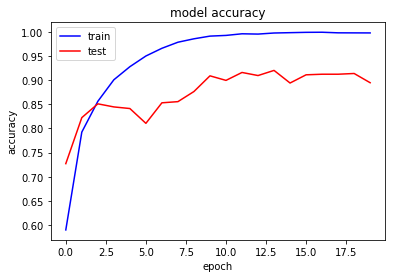

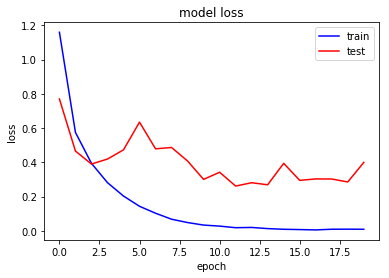

In [2]:
#ploting the graphs to see the loss and accuracy curves
acc=history.history['acc']
val_acc = history.history['val_acc']
loss=history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')

plt.figure()

plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.figure()

plt.show()

In [4]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
%matplotlib inline
import itertools

#confusion Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples//batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Boat', 'Bus','Car','Motorcycle','Planes','Suv','Tractor','Trailer','Train', 'Truck', 'Van']
print(classification_report(validation_generator.classes, y_pred, target_names = target_names))

Confusion Matrix
[[283   2   0   0   3   0   1   3   8   0   0]
 [  0 292   0   0   0   0   0   1   1   6   0]
 [  0   0 216   0   0  64   2  12   4   2   0]
 [  2   0   1 232   0   2  58   4   1   0   0]
 [  3   0   0   0 279   0   1  14   2   1   0]
 [  0   0  69   0   0 226   0   4   0   1   0]
 [  0   0   0   0   0   0 297   0   3   0   0]
 [  1   1   0   0   0   1   5 288   3   0   1]
 [  2   0   0   0   4   0   3   6 285   0   0]
 [  0   3   0   0   0   1   1   5   1 281   8]
 [  0   0   0   0   0   0   0   0   0  28 272]]
Classification Report
              precision    recall  f1-score   support

        Boat       0.97      0.94      0.96       300
         Bus       0.98      0.97      0.98       300
         Car       0.76      0.72      0.74       300
  Motorcycle       1.00      0.77      0.87       300
      Planes       0.98      0.93      0.95       300
         Suv       0.77      0.75      0.76       300
     Tractor       0.81      0.99      0.89       300
     Trail